___
# MINIPROJETO 2 - Teorema do limite central

## <font color='red'>Paulo Tozzo, Leonardo Medeiros, Lucas Chen</font>
___

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import itertools

Utilizaremos a distribuição exponencial

In [4]:
#1b sorteio aleatório de um número grande de valores da distribuição
tamanho=1000

destribuição_aleatoria_teorica = stats.expon.rvs(loc=0, scale=1, size=tamanho, random_state=None)
da = destribuição_aleatoria_teorica

#1c calculo da media e variancia desses valores
print(np.mean(da))
print(np.var(da))

1.01008286794
1.06841748324


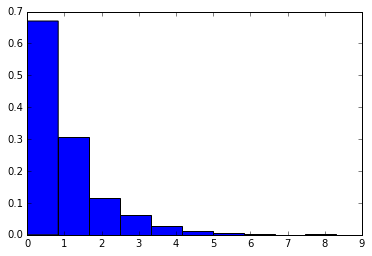

In [5]:
#histograma da distribuição aleatória
plt.hist(da,normed=1)
print()

1.78858749226
 média:  1.00789226746  mediana:  0.827657902115  variância:  0.494109419255


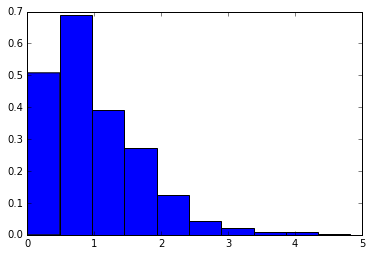

In [6]:
#função da distribuição da média amostral

def tlc(n,tamanho,amostra_aleatoria = False):
    
    # X1 e X9 são necessarios para o item 4
    X1 = []
    X9 = []
    
    
    medias = []
    for i in range (tamanho): 
        l2 = np.random.choice(da,size=n,replace=False) # sorteamos n valores aleatórias da distribuição aleatoria (da)
        
        if amostra_aleatoria != False and n >= 8: # necessario para o item 4
            X1.append(l2[0])
            X9.append(l2[8])
        
        x = np.mean(l2) # cálculo da média
        medias.append(x) # append da média em uma lista
        
        
    print(x) #printa a última média calculada
    
    print(' média: ',np.mean(medias)," mediana: ",np.median(medias),' variância: ',np.var(medias))
    
    plt.hist(medias,normed=1) # histograma das médias
    
    medias_medias = np.mean(medias) # cálculo da média das médias
    medias_var = np.var(medias) # cálculo da variancia das médias
    
    if amostra_aleatoria != False and n>9 : # necessário para o item 4
        return X1,X9
    


tlc(2,tamanho) #histograma das médias para: n=2


Como o n é pequeno o gráfico não se aproxima de uma normal

1.30139243902
 média:  1.01115307776  mediana:  0.914218897724  variância:  0.256752008898


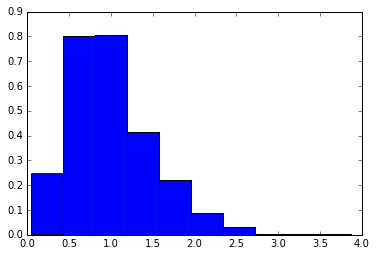

In [7]:
tlc(4,tamanho) #histograma das médias para: n=4

0.772607888976
 média:  0.997192416038  mediana:  0.979985918613  variância:  0.0507834001123


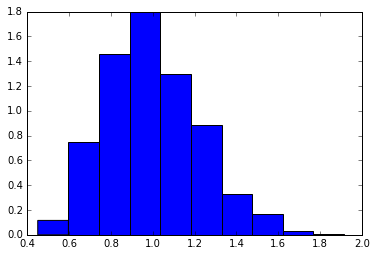

In [8]:
tlc(20,tamanho) #histograma das médias para: n=20

1.04336767591
 média:  1.01009293411  mediana:  1.00409427043  variância:  0.0199737369584


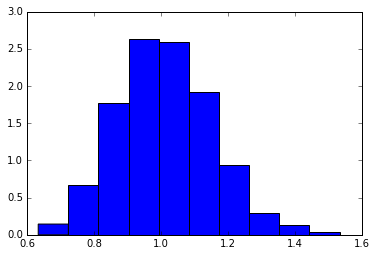

In [9]:
X1,X9 = tlc(50,tamanho,True) #histograma das médias para: n=50 , também captura as listas X1 e X9 para o item 4

0.85509405122
 média:  1.01051657226  mediana:  1.00635606028  variância:  0.00956294940053


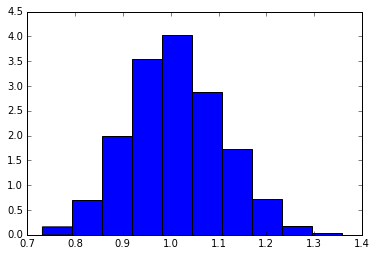

In [10]:
tlc(100,tamanho) #histograma das médias para: n=100

Como vimos através dos resultados obtidos, mesmo escolhendo uma distribuição aleatória que gera um gráfico não similar a uma normal, a distribuição da média amostral se torna uma normal a partir de n = 30 se aproximando mais a esse tipo de distribuição quando n tende a infinito (suficientemente grande), ao calcular a média das médias das amostras, nessas mesmas condições, se obtém um valor mais aproximado do μ real, com maior precisão, para justificar essa modificação de comportamento pode-se comparar a média, variância e mediana para cada n diferente. Em uma normal a média e mediana são iguais, logo neste teste quando n aumenta a mediana e media se tornam cada vez mais próximas. Na mesma condição a variância tende a se tornar menor, representando a aproximação de μ real.

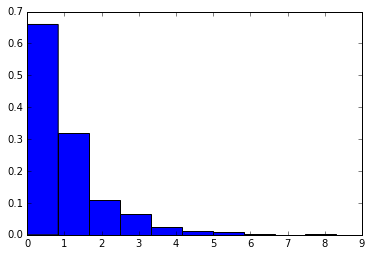

In [11]:
#histograma da lista X1
plt.hist(X1,normed=1)
print( )

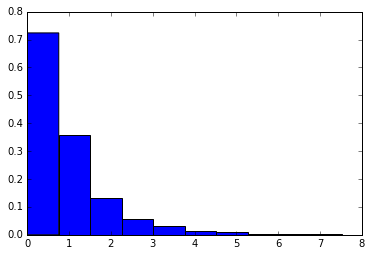

In [12]:
#histograma da lista X9
plt.hist(X9,normed=1)
print()

In [15]:

cv = 0
mediaX1 = np.mean(X1)
mediaX9 = np.mean(X9)

for i in range(tamanho):
    soma = ((X1[i]-mediaX1)*(X9[i]-mediaX9))
    cv += soma
    covariancia = cv/tamanho
    
    correlacao = covariancia/(np.var(X1) * np.var(X9))
    
print("Correlação entre X1 e X9:", correlacao)

Correlação entre X1 e X9: -0.0168717372459


Através da comparação dos resultados obtidos na construção da distribuição X1 e X2 percebemos que essas distribuições são independentes entre si, como o esperado, visto que ambas são aleatórias, o que se justifica pelo valor correlação, que é muito distante de 1. Como os diversos valores de X1 e X2 sao obtidos aleatoriamente dentro da distribuição aleatoria (da), a distribuição de X1 e X2 tendem a ter o mesmo comportamento da distribuição (da).